#### Dataset Used : Titanic ( https://www.kaggle.com/c/titanic )

This dataset basically includes information regarding all the passengers on Titanic . Various attributes of passengers like age , sex , class ,etc. is recorded and final label 'survived' determines whether or the passenger survived or not .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
titanic_data_df = pd.read_csv('titanic-data.csv')

1.   **Survived:** Outcome of survival (0 = No; 1 = Yes)
2.  **Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.   **Name:** Name of passenger
4.  **Sex:** Sex of the passenger
5.  **Age:** Age of the passenger (Some entries contain NaN)
6.  **SibSp:** Number of siblings and spouses of the passenger aboard
7.  **Parch:** Number of parents and children of the passenger aboard
8.   **Ticket:** Ticket number of the passenger
9.   **Fare: **Fare paid by the passenger
10. **Cabin** Cabin number of the passenger (Some entries contain NaN)
11. **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

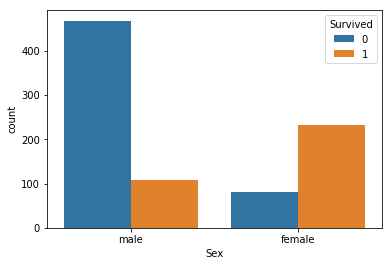

In [3]:
g = sns.countplot(x='Sex', hue='Survived', data=titanic_data_df)

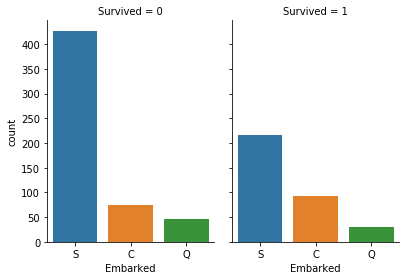

In [4]:
g = sns.catplot(x="Embarked", col="Survived",
                 data=titanic_data_df, kind="count",
                 height=4, aspect=.7);

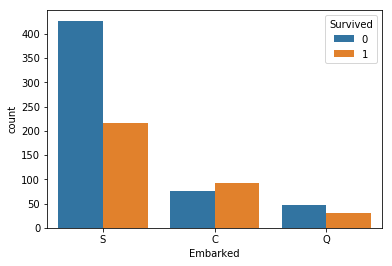

In [5]:
g = sns.countplot(x='Embarked', hue='Survived', data=titanic_data_df)

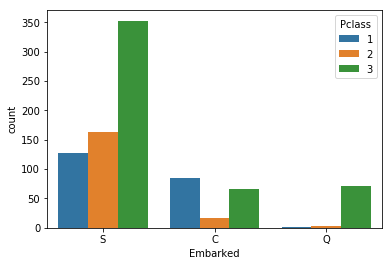

In [6]:
g = sns.countplot(x='Embarked', hue='Pclass', data=titanic_data_df)

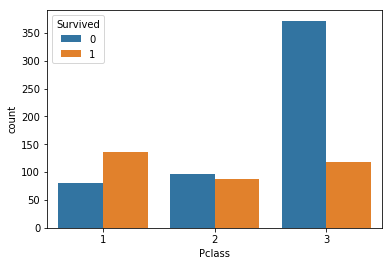

In [7]:
g = sns.countplot(x='Pclass', hue='Survived', data=titanic_data_df)

## Add a new column - Family size   
I will be adding a new column 'Family Size' which will be the SibSp and Parch + 1

In [8]:
#Function to add new column 'FamilySize'
def add_family(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
    return df

titanic_data_df = add_family(titanic_data_df)
titanic_data_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


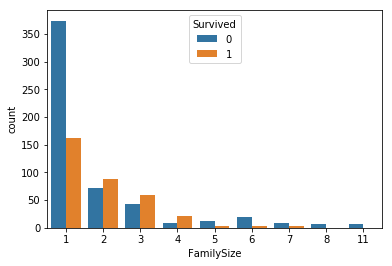

In [9]:
g = sns.countplot(x="FamilySize", hue="Survived",
                 data=titanic_data_df);

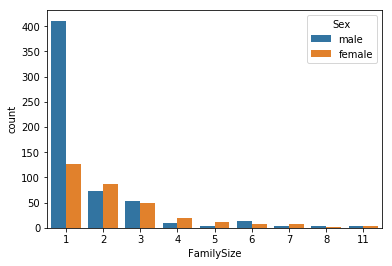

In [10]:
g = sns.countplot(x="FamilySize", hue="Sex",
                 data=titanic_data_df);

## Add a new column - Age Group  


In [11]:
age_df = titanic_data_df[~titanic_data_df['Age'].isnull()]
#Make bins and group all passengers into these bins and store those values in a new column 'ageGroup'
age_bins = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
age_df['ageGroup'] = pd.cut(titanic_data_df.Age, range(0, 81, 10), right=False, labels=age_bins)

/home/kashif/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
age_df[['Age', 'ageGroup']]

,Age,ageGroup
0,22.0,20-29
1,38.0,30-39
2,26.0,20-29
3,35.0,30-39
4,35.0,30-39
6,54.0,50-59
7,2.0,0-9
8,27.0,20-29
9,14.0,10-19
10,4.0,0-9


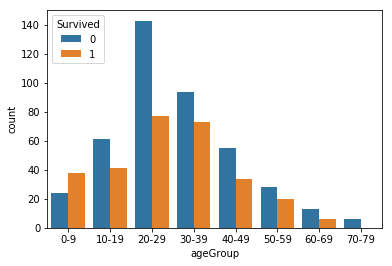

In [13]:
sns.countplot(x='ageGroup', hue='Survived', data=age_df)